In [1]:
import numpy as np
import pandas as pd
from nltk.tokenize import TweetTokenizer
import torch
from sentence_transformers import SentenceTransformer
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import analysis
from train import *


/home/runxuan/anaconda3/envs/ml/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
model = SentenceTransformer('all-MiniLM-L6-v2') 

In [36]:
subreddit = "Showerthoughts"
df = pd.read_csv(f"./data/csvdata/{subreddit}.csv")
df = analysis.cleanDataConcatenate(df)
df = df[:20000]
df

,Title,Text,Upvotes,Subreddit,Num_comments,nsfw,Upvote_ratio,Has_text
0,The best way to go unrecognized by others thes...,the best way to go unrecognized by others thes...,1,Showerthoughts,1,False,1.00,True
1,Evaporated black coffee is a direct measure of...,evaporated black coffee is a direct measure of...,3,Showerthoughts,13,False,0.67,True
2,You are close to someone on discord when they ...,you are close to someone on discord when they ...,1,Showerthoughts,1,False,0.57,True
3,Every POV Is Actually A Camera´s POV,every pov is actually a camera´s pov,1,Showerthoughts,1,False,1.00,True
4,If I can’t believe it’s not butter isn’t butte...,if i can’t believe it’s not butter isn’t butte...,1,Showerthoughts,1,False,1.00,True
...,...,...,...,...,...,...,...,...
19995,Rejecting jokes about minorities reinforces th...,rejecting jokes about minorities reinforces th...,0,Showerthoughts,15,False,0.50,True
19996,10/10 would shower again.,10/10 would shower again.,1,Showerthoughts,1,False,1.00,True
19997,"Pirates get a bad wrap, as they were one of th...","pirates get a bad wrap, as they were one of th...",44,Showerthoughts,10,False,0.80,True
19998,Saying you wear your partner’s underwear might...,saying you wear your partner’s underwear might...,3,Showerthoughts,3,False,0.59,True


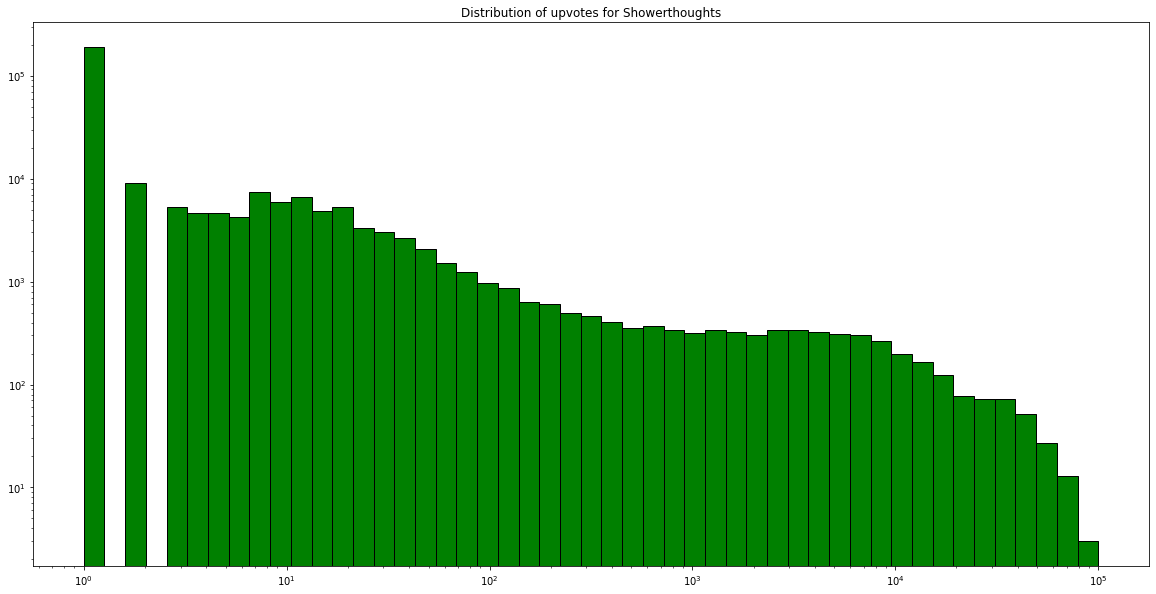

In [32]:
analysis.upvoteHist(df)

/tmp/ipykernel_12371/1186738976.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tempdf['Upvotes'] = np.log(tempdf['Upvotes'])


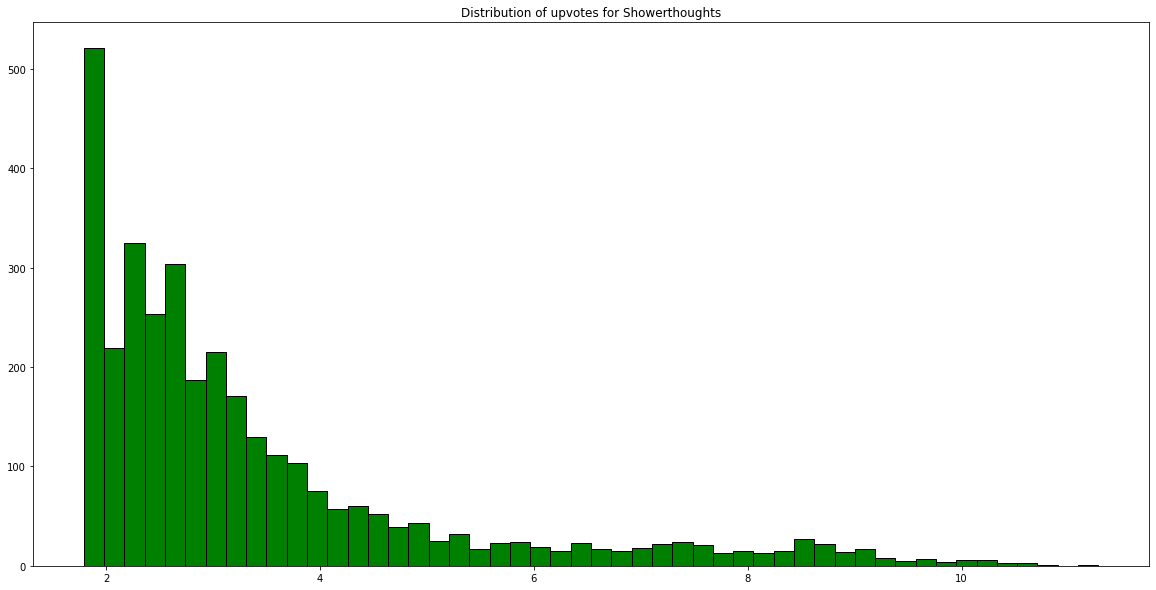

In [40]:
    figure(figsize=(20, 10))
    tempdf = df[df['Upvotes'] > 5]
    tempdf['Upvotes'] = np.log(tempdf['Upvotes'])
    plt.hist(tempdf['Upvotes'], bins=50, log=False, edgecolor='black', color='green')
    plt.title(f"Distribution of upvotes for {subreddit}")
    plt.show()

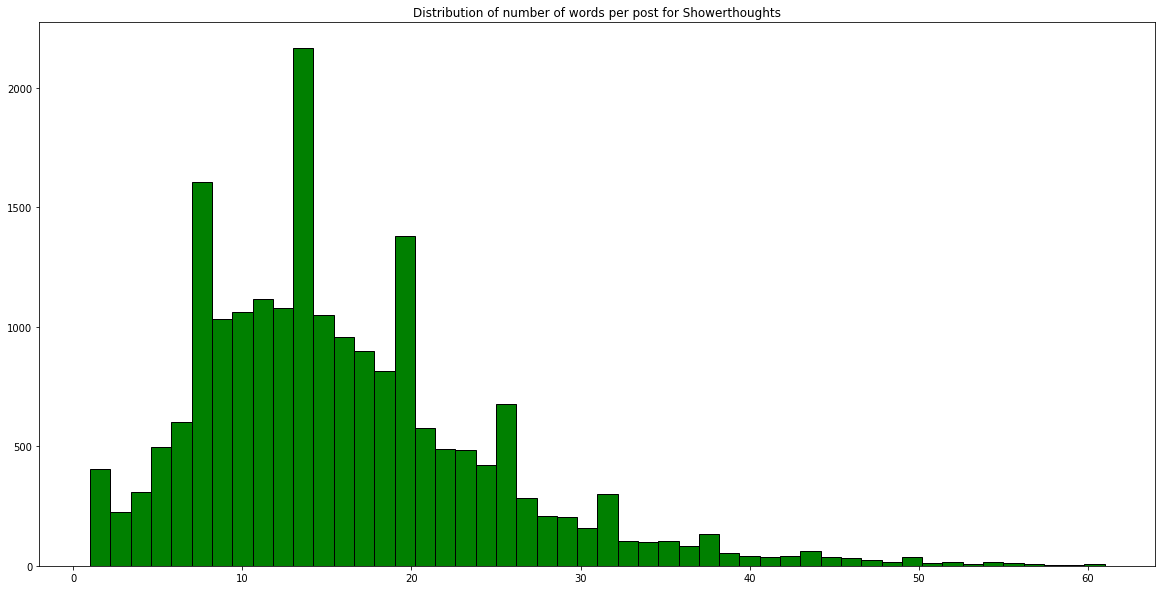

In [7]:
analysis.numWordsHist(df)

In [37]:
X = model.encode(df['Text'].to_numpy())
y = df['Upvotes'].to_numpy()

In [ ]:
crossValidate(X, y, trainOLS, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainRidge, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainLasso, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainElasticNet, evalsklearn, mse)

In [ ]:
crossValidate(X, y, trainRandomForest, evalsklearn, mse)